        Домашняя работа 4.2

Задание 1. Построить график изменения количества имен Ruth и Robert с 1900 по 2000.

In [11]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import re

%matplotlib inline

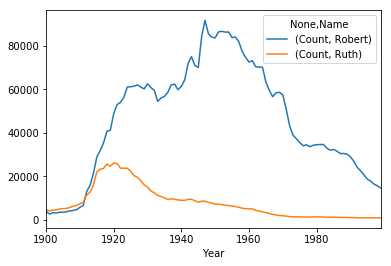

In [23]:
names_by_year = {}
for year in range(1900, 2000):
    names_by_year[year] = pd.read_csv(
        './names/yob{}.txt'.format(year), names=['Name','Gender','Count']
    )
names_all = pd.concat(names_by_year, names=['Year', 'Pos'])

name_dynamics = names_all.groupby([names_all.index.get_level_values(0), 'Name']).sum()

name_dynamics.query('Name == ["Ruth", "Robert"]').unstack('Name').plot()

Задание 2. Построить гистограмму по количеству их имен с 1900 по 2000 с 5-летними промежутками (1900, 1905, 1910, …, 1995, 2000).

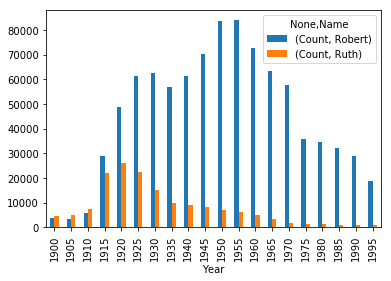

In [3]:
names_by_year = {}
for year in range(1900, 2000, 5):
    names_by_year[year] = pd.read_csv(
        './names/yob{}.txt'.format(year),
        names=['Name','Gender','Count']
    )
names_all = pd.concat(names_by_year, names=['Year', 'Pos'])

name_dynamics = names_all.groupby([names_all.index.get_level_values(0), 'Name']).sum()

name_dynamics.query('Name == ["Ruth", "Robert"]').unstack('Name').plot.bar()

Задание 3. Построить круговую диаграмму по количеству употреблений для ТОП-10 популярных имен, начинающихся на R, за 1950 год.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000FD0A4A8>], dtype=object)

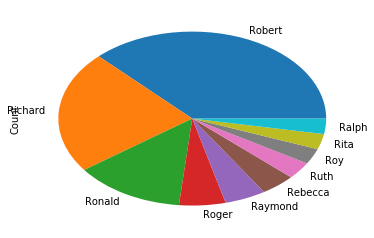

In [4]:
year = 1950
names_all = pd.read_csv('./names/yob'+str(year)+'.txt', names=['Name', 'Gender', 'Count'])

names_r = names_all[names_all.Name.str.startswith('R')].groupby('Name').sum().sort_values(
    by='Count', axis=0, ascending=False).head(10)

names_r.plot.pie(subplots=True, legend=False)

Задание 4. Построить точечную диаграмму по количеству согласных букв в именах и частоте употребления за 100 лет. Т.е. необходимо сложить всю статистику с 1900 до 2000, сгруппировать по именам, посчитать количество согласных букв в каждом имени и вывести на график отношение "Количество согласных букв в имени" : "Количество употреблений".

In [81]:
names_by_year = {}
for year in range(1900, 2001):
    names_by_year[year] = pd.read_csv('./names/yob{}.txt'.format(year), names=['Name','Gender','Count'])
names_all = pd.concat(names_by_year, names=['Year', 'Pos'])
name_dynamics = names_all.groupby([names_all.index.get_level_values(0), 'Name']).sum()

In [91]:
name_dynamics.head(5)

Count
Year Name        
1900 Aaron    103
     Abbie    112
     Abby       7
     Abe       56
     Abel      15

In [99]:
names_all.groupby('Name').sum().sort_values(by='Count', ascending=False).head(5)

,Count
Name,
James,4810186
John,4739822
Robert,4638865
Michael,4023388
Mary,3853598


In [108]:
vowels = '[aeiouy]' 
def count_vowels(name):
    v = re.findall(vowels, name, re.IGNORECASE)
    return len(v)
def count_consonants(name):
    return len(name) - count_vowels(name)


main_df['Cons'] = list(map(count_consonants, names_all.Name))
main_df['Len'] = list(map(len, names_all.Name))

# print(main_df)


In [109]:
len_df = main_df.groupby('Cons').agg('sum').Total.to_frame()


plt.scatter(list(len_df.index.values), list(len_df.Total) )

AttributeError: 'dict' object has no attribute 'groupby'